<a href="https://colab.research.google.com/github/rbrabusa/cmpt3830_alpaca/blob/kir/cmpt3830_phase_1_go_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Loyalty-Driven Dealer Performer Analysis
## GO Auto Services - Exploratory Data Analysis

**Team Members:**

Ramon - rrabusa@norquest.ca

Manpreet - mloyal@norquest.ca
Ramon - rrabusa@norquest.ca
Kiran - kkaur707@norquest.ca

### Problem Statement: Loyalty-Driven Dealer Performance (Clustering + Comparative Analysis)

#### Goal: Analyze how loyalty program participation impacts dealership performance and customer behavior. The objective is to identify whether dealerships with higher loyalty card usage show stronger retention, higher average gross revenue, and more consistent service activity compared to those with lower adoption rates.

#### Use Cases:
- Loyalty Impact by Dealer: Compare dealerships to see which locations benefit most from loyalty card usage (e.g., higher repeat visits, higher average cost per service).
- Customer Segmentation by Loyalty: Cluster customers into groups such as “loyalty-driven repeat clients,” “occasional users,” and “non-loyalty walk-ins,” and compare their service patterns across dealerships.
- Dealer benchmarking: Evaluate whether dealerships with high loyalty participation also outperform in revenue, retention, and service frequency compared to those with low participation
- Distance Insights: Explore if loyalty members are more willing to travel longer distances to specific dealerships


#### Outcome:
- Clusters of dealerships grouped by loyalty adoption and performance.
- Customer segments showing different loyalty-driven behaviors.
- A performance dashboard that highlights which dealerships use loyalty effectively and which may need support.
- Actionable recommendations for leadership on how to leverage the loyalty program to improve dealer performance, customer retention, and revenue.


### Demo 1 Objectives
1. Assess data quality and understand loyalty program distribution
2. Explore preliminary patterns in loyalty vs. non-loyalty customer behavior.
3. Conduct initial dealer-level performance comparison
4. Set foundation for clustering analysis in Demo 2

## 1. Understanding GO Auto Services

**Organization Overview:**  
GO Auto is Edmonton's premier automotive service group, operating seven dealership locations across the city. The organization's mission centers on customer retention and loyalty-driven growth, with a particular focus on maintaining customer relationships beyond the critical five-year post-purchase period.

**Business Challenge:**  
GO Auto faces significant customer attrition after the initial warranty period (typically 5 years). The leadership team seeks data-driven insights to understand how their loyalty card program impacts dealer performance, customer retention, and revenue generation.

**Services:**
- New and used vehicle sales across multiple brands (Toyota, Honda, Porsche, BMW, Nissan, Infiniti, Hyundai)
- Comprehensive service and maintenance
- Parts department
- Loyalty program with rewards and benefits

**Relevance to Project:**  
Our analysis will help GO Auto understand which dealerships effectively leverage the loyalty program, identify customer segments with different loyalty behaviors, and provide actionable recommendations for improving retention and revenue across all locations.

## 2. Dataset Description

**Data Source:** GO Auto Services Customer Database (2020-2024)  
**Records:** 242,818 service transactions  
**Dealerships:** 7 locations across Edmonton  

**Key Variables:**

| Variable | Type | Description |
|----------|------|-------------|
| `service_date` | String/Date | Date of service visit |
| `sale_date` | String/Date | Original vehicle purchase date |
| `customer_pay` | Integer | Amount paid by customer ($) |
| `warranty_pay` | Integer | Amount covered by warranty ($) |
| `year` | Integer | Vehicle manufacturing year |
| `make` | String | Vehicle manufacturer |
| `model` | String | Vehicle model |
| `vin` | Integer | Vehicle identification number (customer proxy) |
| `loyalty_card` | String | Loyalty program participation (Yes/No) |
| `cost` | String | Total service cost |
| `appointment` | Boolean | Service was scheduled (True/False) |
| `mileage` | Integer | Vehicle odometer reading |
| `dealer_name` | String | Dealership location |
| `distance` | Float | Distance customer traveled to dealership (km) |

**Data Quality Notes:**
- Cost field requires parsing (stored as string with currency symbol)
- Date fields need conversion for temporal analysis

## 3. Problem Statement

**Research Question:**  
How does loyalty program participation impact dealership performance, and what customer segments drive different loyalty behaviors across GO Auto's seven Edmonton locations?

**Specific Objectives:**

1. **Loyalty Impact Assessment:** Quantify the relationship between loyalty card adoption rates and key performance metrics (repeat visits, average revenue, customer distance traveled) across dealerships

2. **Customer Segmentation:** Identify distinct customer behavioral groups based on loyalty participation, visit frequency, spending patterns, and geographic reach

3. **Dealer Benchmarking:** Compare dealership performance in loyalty program effectiveness and determine which locations show the strongest correlation between loyalty adoption and business outcomes

4. **Geographic Analysis:** Evaluate whether loyalty program members demonstrate different travel distance patterns, indicating program value perception

**Business Alignment:**  
This analysis directly addresses GO Auto's strategic priority of improving customer retention beyond the five-year mark by providing evidence-based insights into which dealers excel at leveraging loyalty programs and which customer segments represent the highest-value retention opportunities.

## 4. Data Loading and Initial Inspection

**Sprint 1 Task S1-1:** Load and inspect GO Auto dataset  
**Assigned:** Team | **Status:** Complete

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization defaults
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("Libraries loaded successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries loaded successfully
Pandas version: 2.2.2
NumPy version: 2.0.2


In [ ]:
# Load dataset
df = pd.read_csv('GoAutoServices.csv')

print("DATASET LOADED SUCCESSFULLY")
print(f"\nTotal Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"\nDataset Shape: {df.shape}")

DATASET LOADED SUCCESSFULLY

Total Records: 242,818
Total Features: 14

Dataset Shape: (242818, 14)


In [ ]:
# Display first few records
print("SAMPLE RECORDS (First 5)")
df.head()

SAMPLE RECORDS (First 5)


,service_date,sale_date,customer_pay,warranty_pay,year,make,model,vin,loyalty_card,cost,appointment,mileage,dealer_name,distance
0,7/29/2024 0:00,21-Apr,1,0,2021,TOYO,RAV4HY,3395527356,Yes,200-300,True,39076,Toyota on the Trail,9.0
1,7/30/2024 0:00,23-Dec,1,1,2024,TOYO,RAV4HY,5296888873,Yes,0-100,True,39556,Toyota on the Trail,12.0
2,7/2/2024 0:00,20-Mar,1,1,2020,LAND,RR,9475224721,No,1300-1400,True,66001,Jaguar Land Rover Edmonton,10.8
3,7/3/2024 0:00,23-Jul,1,1,2018,NISS,PATH,3446880696,No,500-600,True,82454,Go Nissan South,15.3
4,10/30/2022 0:00,11-May,1,0,2008,FORD,FUSN,5577514554,No,0-100,True,5,Kentwood Ford,4.8


In [ ]:
# Display basic information
print("DATASET INFORMATION")
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242818 entries, 0 to 242817
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   service_date  242818 non-null  object 
 1   sale_date     242818 non-null  object 
 2   customer_pay  242818 non-null  int64  
 3   warranty_pay  242818 non-null  int64  
 4   year          242818 non-null  int64  
 5   make          242818 non-null  object 
 6   model         242818 non-null  object 
 7   vin           242818 non-null  int64  
 8   loyalty_card  242813 non-null  object 
 9   cost          240095 non-null  object 
 10  appointment   242818 non-null  bool   
 11  mileage       242818 non-null  int64  
 12  dealer_name   242818 non-null  object 
 13  distance      242818 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 24.3+ MB


In [ ]:
# Statistical summary
print("STATISTICAL SUMMARY")
df.describe()

STATISTICAL SUMMARY


,customer_pay,warranty_pay,year,vin,mileage,distance
count,242818.000000,242818.000000,242818.000000,2.428180e+05,2.428180e+05,242818.000000
mean,0.841910,0.382365,2018.015135,5.508742e+09,6.689293e+04,43.090641
std,0.364826,0.485966,3.187028,2.587574e+09,6.255440e+04,155.906911
min,0.000000,0.000000,1985.000000,1.000168e+09,0.000000e+00,0.000000
25%,1.000000,0.000000,2016.000000,3.277858e+09,2.398500e+04,5.800000
50%,1.000000,0.000000,2018.000000,5.532262e+09,5.212800e+04,10.600000
75%,1.000000,1.000000,2020.000000,7.728695e+09,9.496775e+04,18.900000
max,1.000000,1.000000,2025.000000,9.999990e+09,1.000000e+07,4212.200000


## 5. Data Quality Assessment

**Sprint 1 Task S1-2:** Clean and preprocess data  
**Assigned:** Kirandeep | **Status:** Complete

In [ ]:
# check missing values
print("MISSING VALUES ANALYSIS")

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)

# only show columns that have missing values
for col in df.columns:
    if missing[col] > 0:
        print(f"{col}: {missing[col]} ({missing_pct[col]}%)")

if missing.sum() == 0:
    print("No missing values!")

MISSING VALUES ANALYSIS
loyalty_card: 5 (0.0%)
cost: 2723 (1.12%)


For loyalty_card: We can drop these rows are they show minimal impact for our analysis but we still must consider if it will be critical for our analysis.

For cost:
- we can impute as cost (Min max) normalization
- as most of the non-missing costs match this formula
- we will need the service cost for phase 2 clustering

In [ ]:
# check for duplicates
dups = df.duplicated().sum()
print("DUPLICATE RECORDS ANALYSIS")
print(f"duplicate rows: {dups}")
print(f"percentage: {(dups/len(df)*100):.2f}%")

if dups > 0:
    print("found some duplicates - might want to look into this")

DUPLICATE RECORDS ANALYSIS
duplicate rows: 4
percentage: 0.00%
found some duplicates - might want to look into this


Decision tree for duplicates:

- if exact duplicates: Drop them
- if same VIN, same service_date: Drop
- if same VIN, different dates: Keep (legitimate customers)

In [ ]:
# data types
print("data type counts:")
print(df.dtypes.value_counts())
print("\nall columns:")
print(df.dtypes)

data type counts:
object     7
int64      5
bool       1
float64    1
Name: count, dtype: int64

all columns:
service_date     object
sale_date        object
customer_pay      int64
warranty_pay      int64
year              int64
make             object
model            object
vin               int64
loyalty_card     object
cost             object
appointment        bool
mileage           int64
dealer_name      object
distance        float64
dtype: object


In [ ]:
# convert dates

# decide on cost field handling

# decide on vin field handling

## 6. Key Variable Analysis

### 6.1 Dealership Distribution

In [ ]:
# look at each dealership
## dealer_stats = df.groupby('dealer_name').agg({
    'vin': 'count',
    'customer_pay': ['sum', 'mean'],
    'loyalty_card': lambda x: (x == 'Yes').sum()
})

# flatten column names
##dealer_stats.columns = ['total_visits', 'total_revenue', 'avg_revenue', 'loyalty_count']

# calculate loyalty rate
##dealer_stats['loyalty_rate'] = (dealer_stats['loyalty_count'] / dealer_stats['total_visits'] * 100).round(2)

# sort by visits
##dealer_stats = dealer_stats.sort_values('total_visits', ascending=False)
##print(dealer_stats)

# find top performers
##print(f"\nmost visits: {dealer_stats['total_visits'].idxmax()}")
##print(f"highest loyalty rate: {dealer_stats['loyalty_rate'].idxmax()} ({dealer_stats['loyalty_rate'].max():.1f}%)")
##print(f"highest avg revenue: {dealer_stats['avg_revenue'].idxmax()} (${dealer_stats['avg_revenue'].max():.2f})")

                            total_visits  total_revenue  avg_revenue  loyalty_count  loyalty_rate
dealer_name                                                                                      
Go Honda                           49942          45206     0.905170          10777         21.58
Norden Volkswagen                  41670          35449     0.850708           4080          9.79
Toyota on the Trail                40283          36258     0.900082          15163         37.64
Kentwood Ford                      38344          31471     0.820754           3416          8.91
Go Nissan South                    29024          19969     0.688017           4880         16.81
Jaguar Land Rover Edmonton         26331          21526     0.817515           3135         11.91
Porsche Centre Edmonton            17224          14552     0.844868           1523          8.84

most visits: Go Honda
highest loyalty rate: Toyota on the Trail (37.6%)
highest avg revenue: Go Honda ($0.91)


### 6.2 Loyalty Card Program Analysis

**Sprint 1 Task S1-3:** Analyze loyalty card distribution by dealer  
**Assigned:** Manpreet | **Status:** In Progress

In [ ]:
# Overall loyalty adoption

### 6.3 Customer Behavior: Loyalty vs Non-Loyalty

**Sprint 1 Task S1-4:** Compare customer behavior (loyalty vs non-loyalty)  
**Assigned:** Ramon | **Status:** In Progress

In [ ]:
# Compare visit patterns and spending

In [ ]:
# Statistical significance testing

## 7. Exploratory Data Visualizations

**Sprint 1 Task S1-5:** Create initial visualizations  
**Assigned:** Team | **Status:** In Progress

Figure 1 generated: Dealership Performance Overview


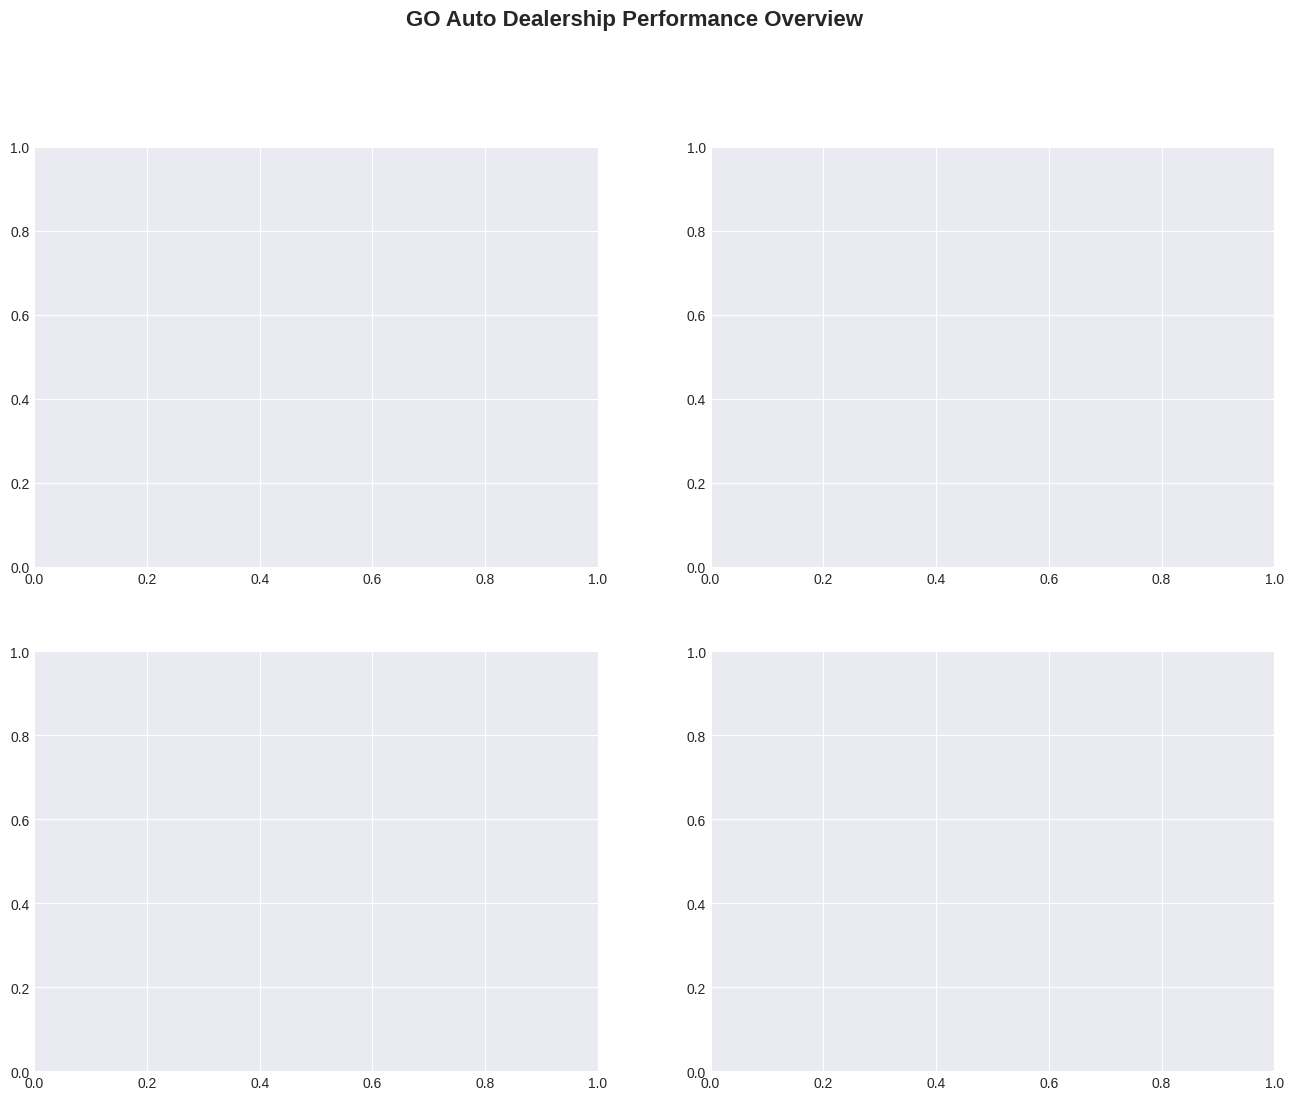

In [ ]:
# Figure 1: Dealership Performance Overview
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('GO Auto Dealership Performance Overview', fontsize=16, fontweight='bold', y=0.995)

# Total visits by dealer


# Loyalty adoption by dealer


# Average revenue per visit


# Revenue distribution loyalty vs non-loyalty


print("Figure 1 generated: Dealership Performance Overview")

Figure 2 generated: Customer Behavior Analysis


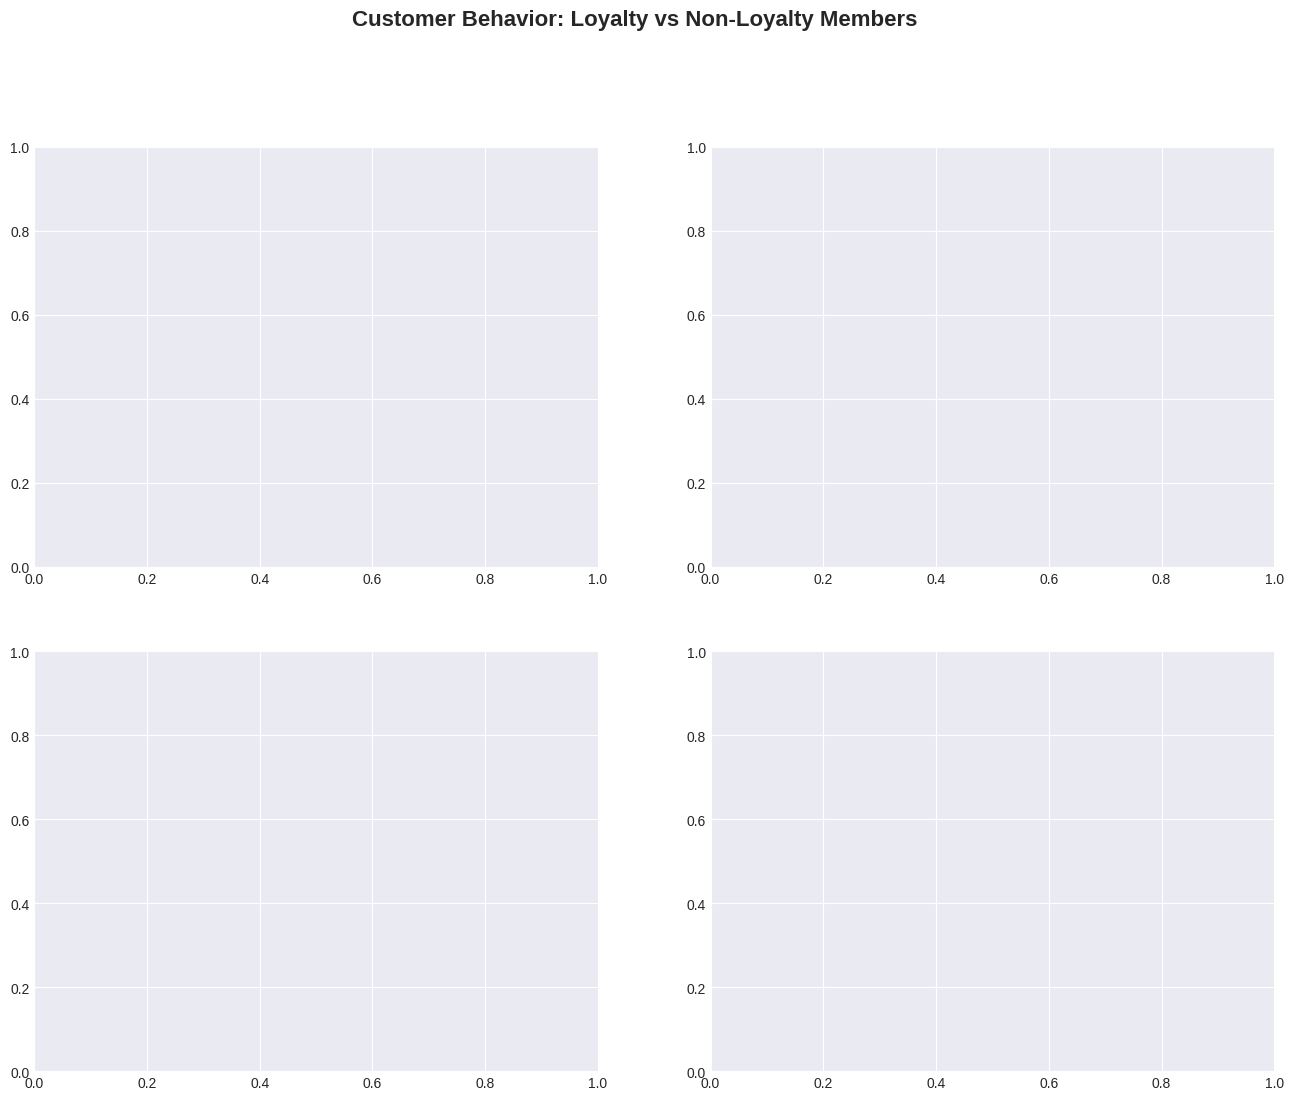

In [ ]:
# Figure 2: Customer Behavior Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Behavior: Loyalty vs Non-Loyalty Members', fontsize=16, fontweight='bold', y=0.995)

# Visit frequency distribution

# Distance traveled

# Spending patterns over time (by month)

# Appointment usage

print("Figure 2 generated: Customer Behavior Analysis")

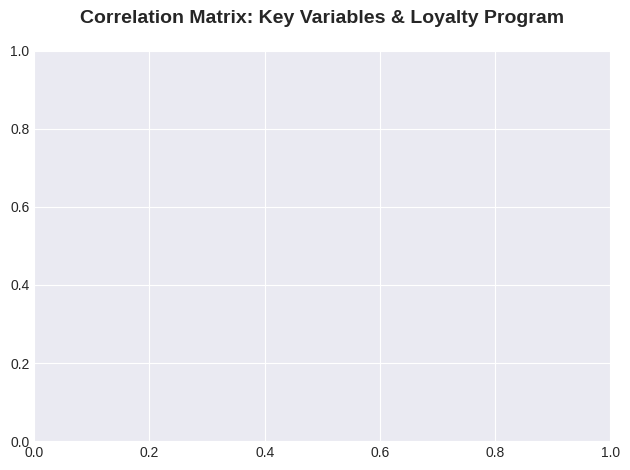

Figure 3 generated: Correlation Heatmap


In [ ]:
# Figure 3: Correlation Heatmap
# Select numeric columns for correlation

# Calculate correlation

# Create heatmap
plt.title('Correlation Matrix: Key Variables & Loyalty Program', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Figure 3 generated: Correlation Heatmap")

## 8. Initial Findings and Insights

**Sprint 1 Task S1-6:** Document findings in shared doc  
**Assigned:** Manpreet | **Status:** In Progress

In [ ]:
# Generate comprehensive findings report
print("KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS")

# Finding 1: Loyalty Adoption Variation

# Finding 2: Visit Frequency

# Finding 3: Revenue per visit

# Finding 4: Distance willing to travel

KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS


## 9. Next Steps for Phase 2

Based on our Sprint 1 EDA, the following tasks are prioritized for Sprint 2:

**Machine Learning Development (Sprint 2-4):**
1. **Customer Segmentation:** Implement clustering algorithm to identify distinct customer groups based on:
   - Visit frequency
   - Average spending
   - Distance traveled
   - Loyalty program engagement

2. **Dealer Performance Clustering:** Group dealerships by:
   - Loyalty adoption success
   - Revenue performance
   - Customer retention metrics

3. **Predictive Modeling:** Develop models to:
   - Predict customer churn risk
   - Forecast loyalty program ROI by dealer
   - Identify factors driving customer distance willingness

